In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import chi2_contingency

In [2]:
data = pd.read_csv('Co2_Nettoye.csv')

In [4]:
# Variables
quant_vars = ['Engine_Size_L', 'Cylinders', 'Fuel_City_L100km', 
              'Fuel_Hwy_L100km', 'Fuel_Comb_L100km', 
              'Fuel_Comb_mpg', 'CO2_Emissions_gkm']

qual_vars = ['Make', 'Vehicle_Class', 'Transmission', 'Fuel_Type']


# CAS 1 : DEUX VARIABLES QUANTITATIVES


CAS 1 : CORRÉLATION ENTRE VARIABLES QUANTITATIVES

--- MATRICE DE CORRÉLATION DE PEARSON ---
Cette matrice résume TOUTES les corrélations entre variables quantitatives
Nombre total de paires analysées : 21

                   Engine_Size_L  Cylinders  Fuel_City_L100km  \
Engine_Size_L              1.000      0.929             0.834   
Cylinders                  0.929      1.000             0.801   
Fuel_City_L100km           0.834      0.801             1.000   
Fuel_Hwy_L100km            0.767      0.718             0.951   
Fuel_Comb_L100km           0.820      0.781             0.994   
Fuel_Comb_mpg             -0.763     -0.724            -0.928   
CO2_Emissions_gkm          0.855      0.835             0.919   

                   Fuel_Hwy_L100km  Fuel_Comb_L100km  Fuel_Comb_mpg  \
Engine_Size_L                0.767             0.820         -0.763   
Cylinders                    0.718             0.781         -0.724   
Fuel_City_L100km             0.951             0.994      

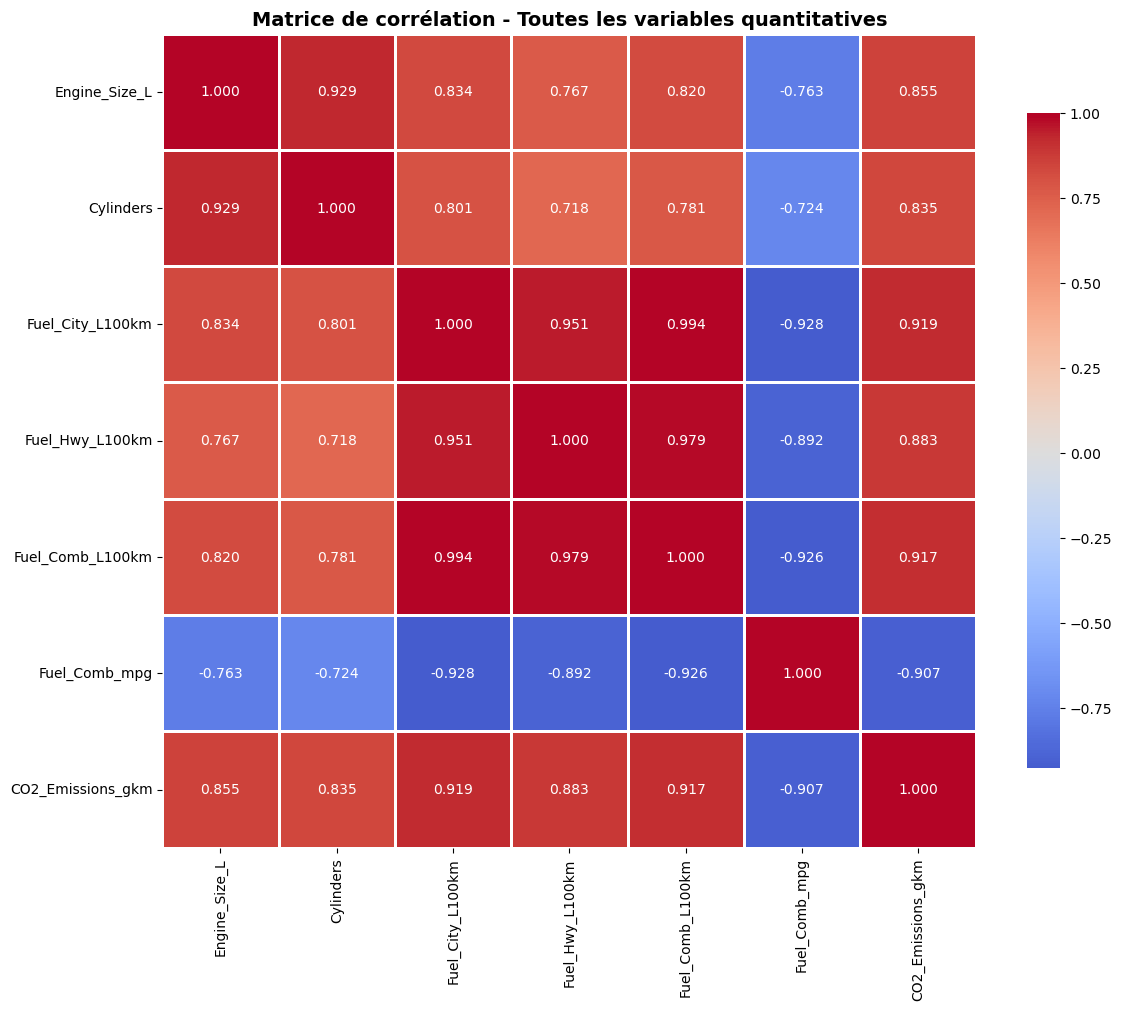


--- CORRÉLATIONS LES PLUS FORTES ---

Top 10 des corrélations (en valeur absolue) :
            Var1              Var2  Correlation
Fuel_City_L100km  Fuel_Comb_L100km     0.994052
 Fuel_Hwy_L100km  Fuel_Comb_L100km     0.978607
Fuel_City_L100km   Fuel_Hwy_L100km     0.950811
   Engine_Size_L         Cylinders     0.928843
Fuel_City_L100km     Fuel_Comb_mpg    -0.927640
Fuel_Comb_L100km     Fuel_Comb_mpg    -0.925801
Fuel_City_L100km CO2_Emissions_gkm     0.918756
Fuel_Comb_L100km CO2_Emissions_gkm     0.916840
   Fuel_Comb_mpg CO2_Emissions_gkm    -0.906783
 Fuel_Hwy_L100km     Fuel_Comb_mpg    -0.891892

--- INTERPRÉTATION ---
Corrélations très fortes (|r| > 0.8) : 16
Corrélations fortes (0.6 < |r| ≤ 0.8) : 5
Corrélations modérées (0.4 < |r| ≤ 0.6) : 0

ANALYSE DÉTAILLÉE DES 3 PAIRES LES PLUS CORRÉLÉES

PAIRE 13 : Fuel_City_L100km vs Fuel_Comb_L100km

Covariance empirique : 10.4065
Coefficient de corrélation (Pearson) : 0.9941
→ Corrélation très forte et positive

--- Régression liné

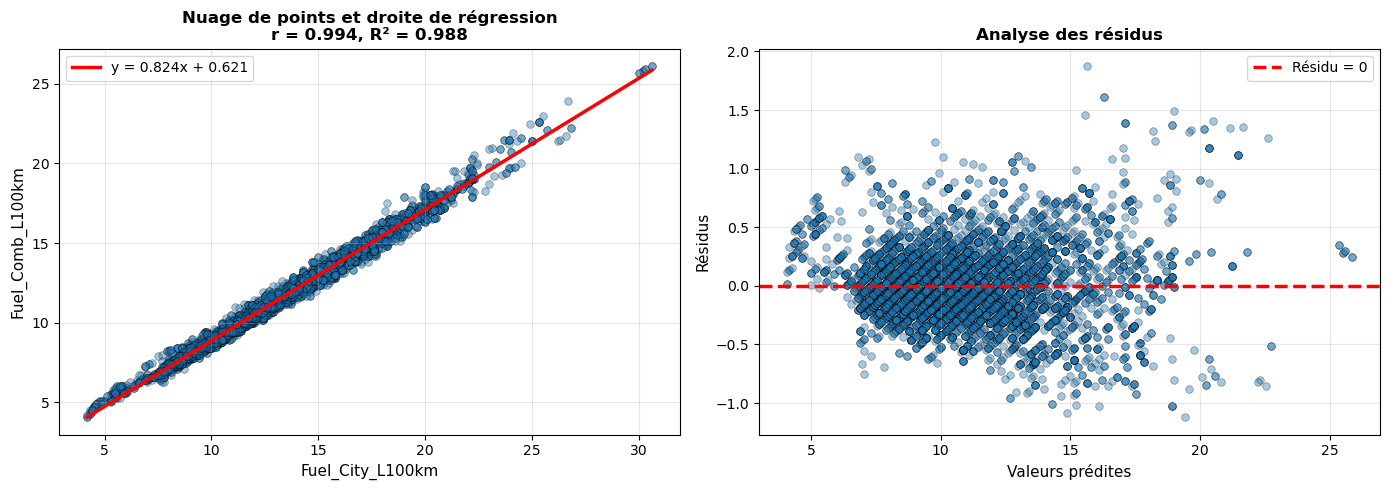


PAIRE 16 : Fuel_Hwy_L100km vs Fuel_Comb_L100km

Covariance empirique : 6.5709
Coefficient de corrélation (Pearson) : 0.9786
→ Corrélation très forte et positive

--- Régression linéaire : Y = aX + b ---
a (pente) = 1.2655
b (ordonnée à l'origine) = -0.4606
Équation : Fuel_Comb_L100km = 1.2655 × Fuel_Hwy_L100km + -0.4606
R² (coefficient de détermination) = 0.9577
→ Le modèle explique 95.77% de la variance


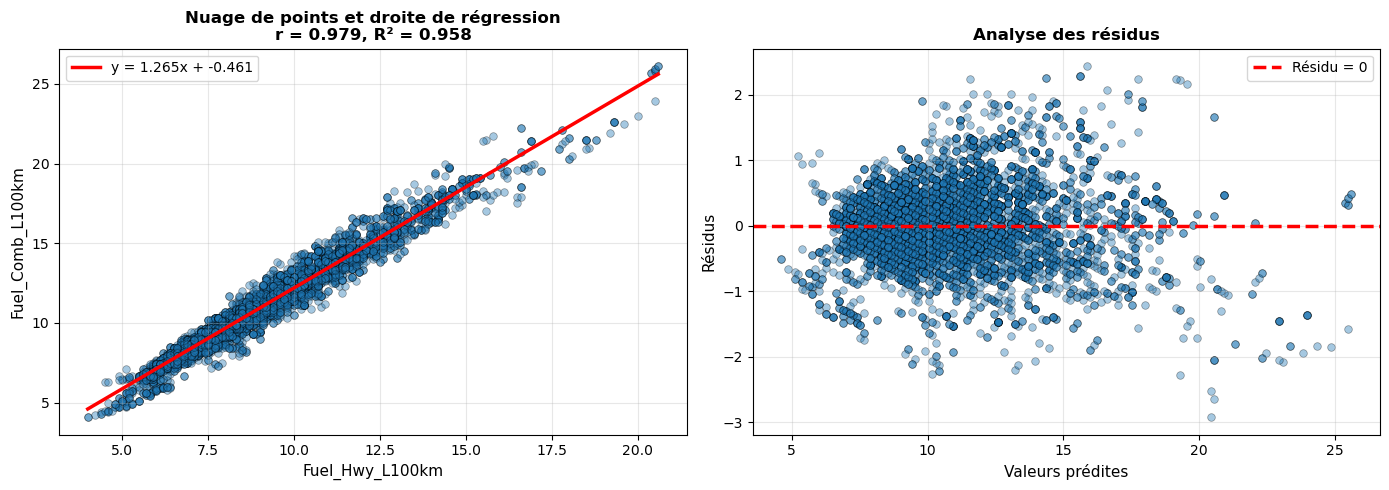


PAIRE 12 : Fuel_City_L100km vs Fuel_Hwy_L100km

Covariance empirique : 7.6975
Coefficient de corrélation (Pearson) : 0.9508
→ Corrélation très forte et positive

--- Régression linéaire : Y = aX + b ---
a (pente) = 0.6098
b (ordonnée à l'origine) = 1.3804
Équation : Fuel_Hwy_L100km = 0.6098 × Fuel_City_L100km + 1.3804
R² (coefficient de détermination) = 0.9040
→ Le modèle explique 90.40% de la variance


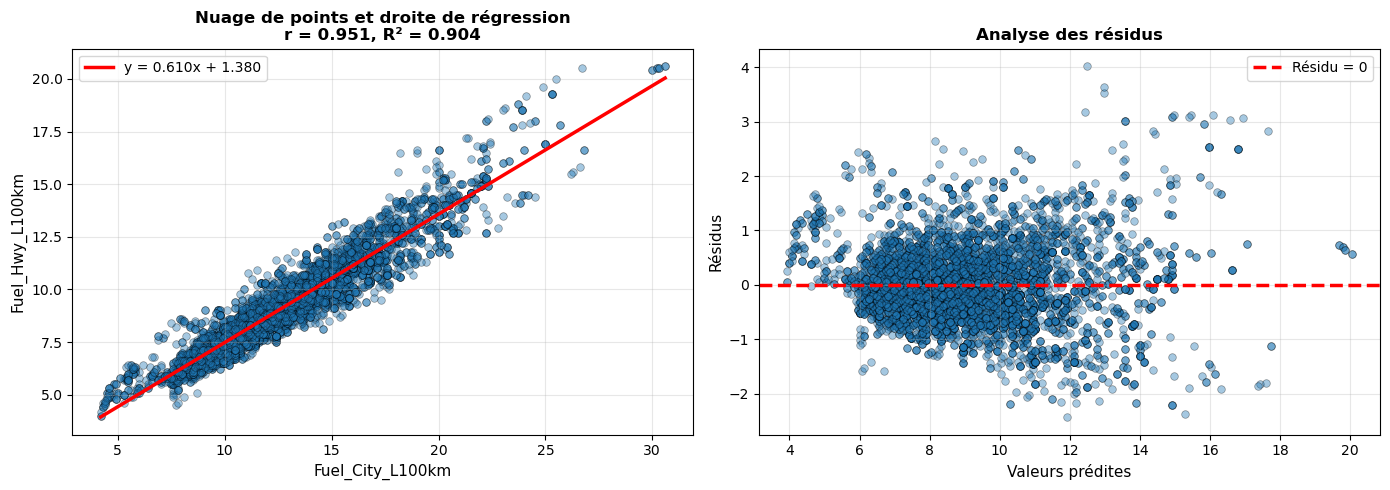

In [9]:
print("\n" + "="*70)
print("CAS 1 : CORRÉLATION ENTRE VARIABLES QUANTITATIVES")
print("="*70)

print("\n--- MATRICE DE CORRÉLATION DE PEARSON ---")
print("Cette matrice résume TOUTES les corrélations entre variables quantitatives")
print(f"Nombre total de paires analysées : {len(quant_vars)*(len(quant_vars)-1)//2}")
print()

corr_matrix = data[quant_vars].corr()
print(corr_matrix.round(3))

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.3f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de corrélation - Toutes les variables quantitatives', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Identifier les corrélations les plus fortes
print("\n--- CORRÉLATIONS LES PLUS FORTES ---")
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append({
            'Var1': corr_matrix.columns[i],
            'Var2': corr_matrix.columns[j],
            'Correlation': corr_matrix.iloc[i, j]
        })

corr_df = pd.DataFrame(corr_pairs)
corr_df['Abs_Corr'] = abs(corr_df['Correlation'])
corr_df_sorted = corr_df.sort_values('Abs_Corr', ascending=False)

print("\nTop 10 des corrélations (en valeur absolue) :")
print(corr_df_sorted.head(10)[['Var1', 'Var2', 'Correlation']].to_string(index=False))

# Interprétation automatique
print("\n--- INTERPRÉTATION ---")
tres_fortes = corr_df_sorted[corr_df_sorted['Abs_Corr'] > 0.8]
fortes = corr_df_sorted[(corr_df_sorted['Abs_Corr'] > 0.6) & (corr_df_sorted['Abs_Corr'] <= 0.8)]
moderees = corr_df_sorted[(corr_df_sorted['Abs_Corr'] > 0.4) & (corr_df_sorted['Abs_Corr'] <= 0.6)]

print(f"Corrélations très fortes (|r| > 0.8) : {len(tres_fortes)}")
print(f"Corrélations fortes (0.6 < |r| ≤ 0.8) : {len(fortes)}")
print(f"Corrélations modérées (0.4 < |r| ≤ 0.6) : {len(moderees)}")

# Sélection automatique des 3 paires les plus corrélées pour analyse détaillée
print("\n" + "="*70)
print("ANALYSE DÉTAILLÉE DES 3 PAIRES LES PLUS CORRÉLÉES")
print("="*70)

top_paires = corr_df_sorted.head(3)

for idx, row in top_paires.iterrows():
    var_x = row['Var1']
    var_y = row['Var2']
    
    print(f"\n{'='*70}")
    print(f"PAIRE {idx+1} : {var_x} vs {var_y}")
    print(f"{'='*70}")
    
    # Covariance et corrélation
    covariance = np.cov(data[var_x], data[var_y], ddof=0)[0, 1]
    correlation = row['Correlation']
    
    print(f"\nCovariance empirique : {covariance:.4f}")
    print(f"Coefficient de corrélation (Pearson) : {correlation:.4f}")
    
    if abs(correlation) > 0.8:
        force = "très forte"
    elif abs(correlation) > 0.6:
        force = "forte"
    elif abs(correlation) > 0.4:
        force = "modérée"
    else:
        force = "faible"
    
    sens = "positive" if correlation > 0 else "négative"
    print(f"→ Corrélation {force} et {sens}")
    
    # Régression linéaire
    slope, intercept, r_value, p_value, std_err = linregress(data[var_x], data[var_y])
    r_squared = r_value**2
    
    print(f"\n--- Régression linéaire : Y = aX + b ---")
    print(f"a (pente) = {slope:.4f}")
    print(f"b (ordonnée à l'origine) = {intercept:.4f}")
    print(f"Équation : {var_y} = {slope:.4f} × {var_x} + {intercept:.4f}")
    print(f"R² (coefficient de détermination) = {r_squared:.4f}")
    print(f"→ Le modèle explique {r_squared*100:.2f}% de la variance")
    
    # Graphiques
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Scatter plot avec droite de régression
    axes[0].scatter(data[var_x], data[var_y], alpha=0.4, s=30, edgecolors='black', linewidth=0.5)
    x_line = np.array([data[var_x].min(), data[var_x].max()])
    y_line = slope * x_line + intercept
    axes[0].plot(x_line, y_line, 'r-', linewidth=2.5, 
                 label=f'y = {slope:.3f}x + {intercept:.3f}')
    axes[0].set_xlabel(var_x, fontsize=11)
    axes[0].set_ylabel(var_y, fontsize=11)
    axes[0].set_title(f'Nuage de points et droite de régression\nr = {correlation:.3f}, R² = {r_squared:.3f}', 
                     fontsize=12, fontweight='bold')
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)
    
    # Résidus
    y_pred = slope * data[var_x] + intercept
    residus = data[var_y] - y_pred
    axes[1].scatter(y_pred, residus, alpha=0.4, s=30, edgecolors='black', linewidth=0.5)
    axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2.5, label='Résidu = 0')
    axes[1].set_xlabel('Valeurs prédites', fontsize=11)
    axes[1].set_ylabel('Résidus', fontsize=11)
    axes[1].set_title('Analyse des résidus', fontsize=12, fontweight='bold')
    axes[1].legend(fontsize=10)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# CAS 2 : UNE VARIABLE QUALITATIVE + UNE VARIABLE QUANTITATIVE (ANOVA)


CAS 2 : VARIABLE QUALITATIVE vs QUANTITATIVE (ANOVA)

ANALYSE : Vehicle_Class vs CO2_Emissions_gkm

--- Statistiques descriptives par catégorie ---

                          Effectif  Moyenne  Ecart-type  Min      Q1  Médiane  \
Vehicle_Class                                                                   
COMPACT                        903   217.64       50.61  106  183.50    207.0   
FULL-SIZE                      508   264.41       55.78   96  234.00    262.0   
MID-SIZE                       983   222.29       55.53  104  184.00    214.0   
MINICOMPACT                    274   236.68       41.06  143  202.00    243.0   
MINIVAN                         61   261.11       18.26  221  250.00    262.0   
PICKUP TRUCK - SMALL           133   277.02       22.50  235  260.00    274.0   
PICKUP TRUCK - STANDARD        475   301.61       31.04  238  279.00    298.0   
SPECIAL PURPOSE VEHICLE         65   237.82       19.97  208  220.00    235.0   
STATION WAGON - MID-SIZE        45   240

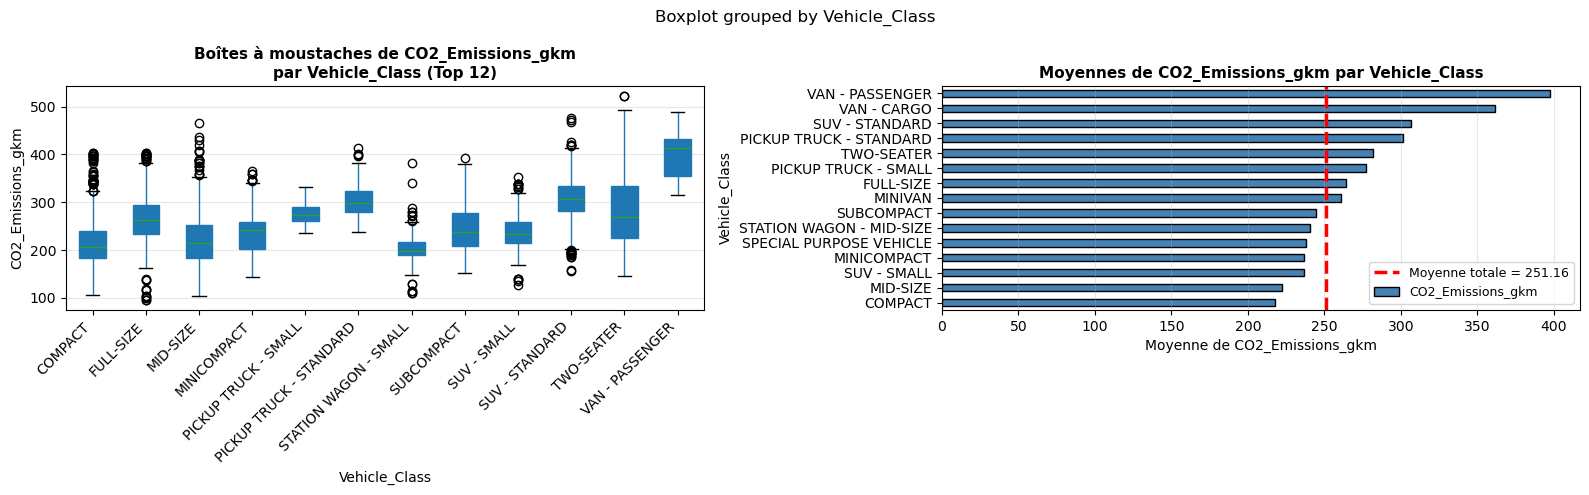


ANALYSE : Fuel_Type vs Fuel_Comb_L100km

--- Statistiques descriptives par catégorie ---

           Effectif  Moyenne  Ecart-type   Min    Q1  Médiane     Q3   Max
Fuel_Type                                                                 
D               147     8.75        1.56   6.3   7.4      9.0  10.05  12.1
E               330    16.93        3.02  10.1  14.9     17.1  18.38  26.1
X              3039    10.13        2.51   4.1   8.2      9.8  11.80  21.2
Z              2765    11.41        2.48   5.3   9.6     10.9  12.90  22.2

--- Test ANOVA (Analysis of Variance) ---
Hypothèse H0 : Les moyennes de tous les groupes sont égales
Statistique F : 803.9256
P-value : 0.000000
→ REJET de H0 (p < 0.05)
→ Les moyennes diffèrent significativement entre les groupes

--- Décomposition de la variance ---
SCT (Somme Carrés Totale) = 54541.85
SCE (Somme Carrés Expliquée) = 15139.39
SCR (Somme Carrés Résiduelle) = 39402.46
Vérification : SCT = SCE + SCR ? True

--- Rapport de corrélation η² -

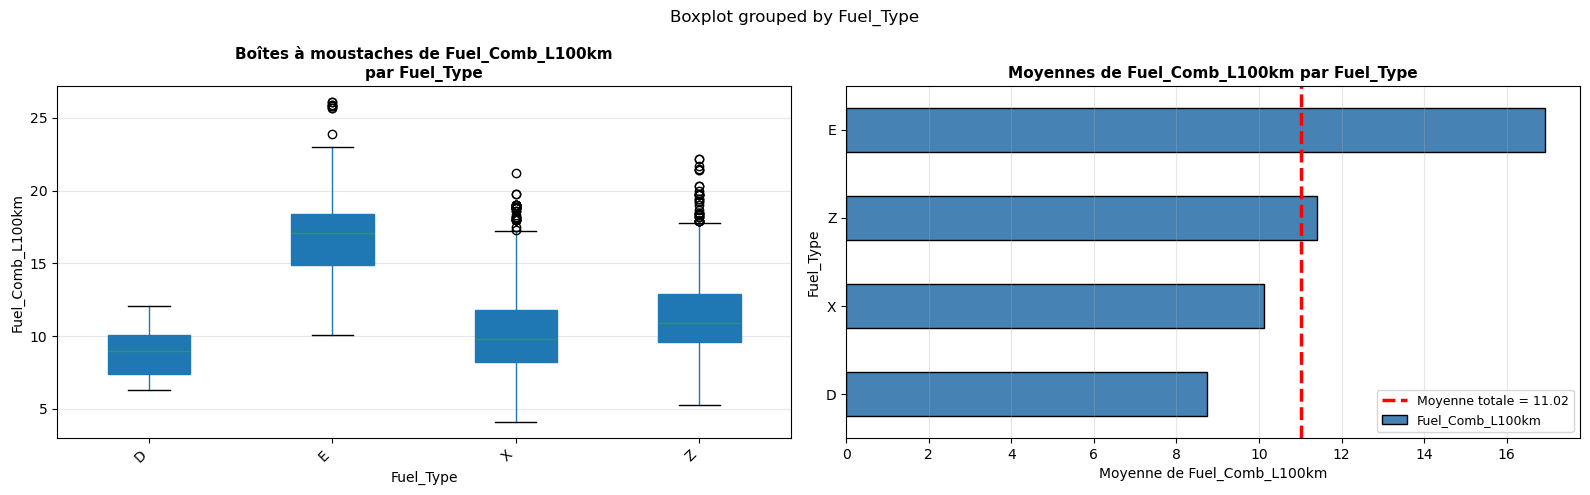


ANALYSE : Transmission vs Engine_Size_L

--- Statistiques descriptives par catégorie ---

              Effectif  Moyenne  Ecart-type  Min    Q1  Médiane    Q3  Max
Transmission                                                              
A10                 28     5.50        1.23  3.0  5.30      6.2  6.20  6.2
A4                  61     3.76        1.64  1.5  1.80      4.6  5.30  5.4
A5                  78     4.21        1.15  1.5  3.60      4.0  5.60  6.8
A6                 684     3.83        1.47  1.4  2.40      3.6  5.30  6.2
A7                  44     4.13        1.28  2.0  3.00      4.0  5.28  6.5
A8                 378     4.32        1.42  1.5  3.60      3.6  5.70  6.7
A9                 263     2.93        0.88  1.3  2.40      3.0  3.60  6.0
AM6                107     2.01        0.61  0.9  1.80      2.0  2.00  3.8
AM7                383     3.41        1.28  1.4  2.50      3.0  4.00  8.0
AM8                 45     3.30        0.90  2.4  2.90      3.0  4.00  6.0
AS10     

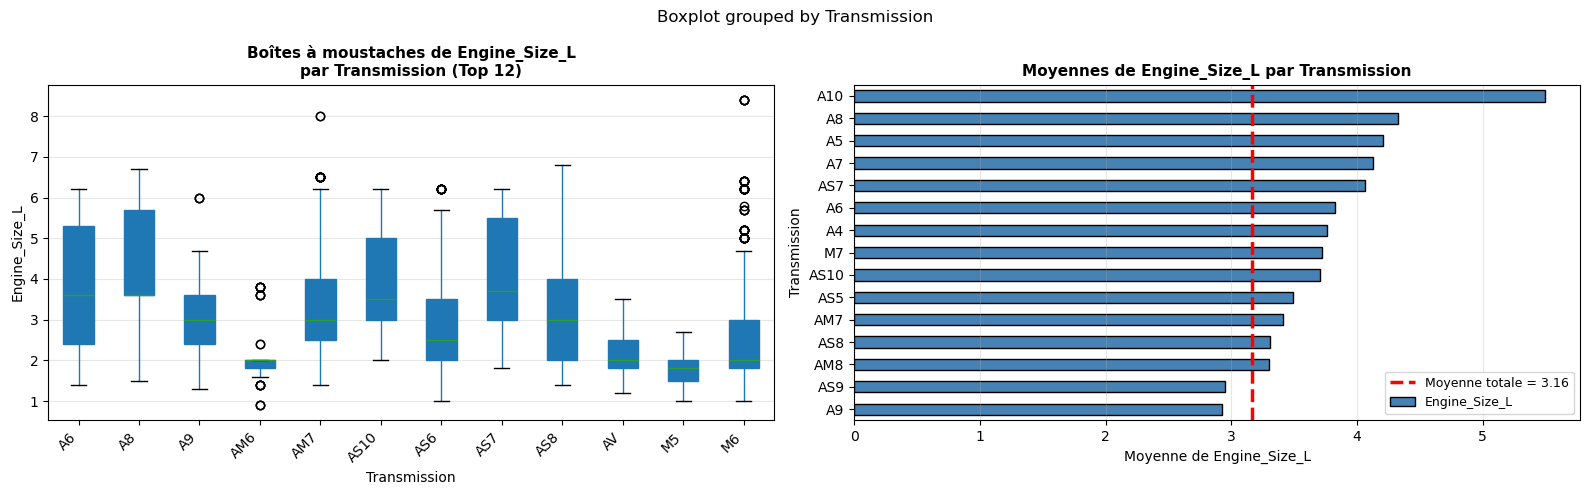

In [7]:
print("\n" + "="*70)
print("CAS 2 : VARIABLE QUALITATIVE vs QUANTITATIVE (ANOVA)")
print("="*70)

combinaisons_anova = [
    ('Vehicle_Class', 'CO2_Emissions_gkm'),
    ('Fuel_Type', 'Fuel_Comb_L100km'),
    ('Transmission', 'Engine_Size_L')
]

for var_qual, var_quant in combinaisons_anova:
    # Filtrer les catégories avec assez d'observations
    counts = data[var_qual].value_counts()
    categories_valides = counts[counts >= 5].index
    data_filtered = data[data[var_qual].isin(categories_valides)]
    
    if len(categories_valides) < 2:
        continue
    
    print(f"\n{'='*70}")
    print(f"ANALYSE : {var_qual} vs {var_quant}")
    print(f"{'='*70}")
    
    # Statistiques par groupe
    print(f"\n--- Statistiques descriptives par catégorie ---\n")
    stats = data_filtered.groupby(var_qual)[var_quant].agg([
        ('Effectif', 'count'),
        ('Moyenne', 'mean'),
        ('Ecart-type', 'std'),
        ('Min', 'min'),
        ('Q1', lambda x: x.quantile(0.25)),
        ('Médiane', 'median'),
        ('Q3', lambda x: x.quantile(0.75)),
        ('Max', 'max')
    ])
    print(stats.round(2))
    
    # Test ANOVA
    groupes_data = [data_filtered[data_filtered[var_qual] == cat][var_quant].values 
                    for cat in categories_valides]
    f_stat, p_value = st.f_oneway(*groupes_data)
    
    print(f"\n--- Test ANOVA (Analysis of Variance) ---")
    print(f"Hypothèse H0 : Les moyennes de tous les groupes sont égales")
    print(f"Statistique F : {f_stat:.4f}")
    print(f"P-value : {p_value:.6f}")
    
    if p_value < 0.05:
        print("→ REJET de H0 (p < 0.05)")
        print("→ Les moyennes diffèrent significativement entre les groupes")
    else:
        print("→ ACCEPTATION de H0 (p >= 0.05)")
        print("→ Pas de différence significative entre les groupes")
    
    # Calcul du rapport de corrélation η²
    moyenne_totale = data_filtered[var_quant].mean()
    
    # SCT (variance totale)
    sct = np.sum((data_filtered[var_quant] - moyenne_totale)**2)
    
    # SCE (variance interclasse)
    sce = 0
    for cat in categories_valides:
        groupe = data_filtered[data_filtered[var_qual] == cat][var_quant]
        n_i = len(groupe)
        mean_i = groupe.mean()
        sce += n_i * (mean_i - moyenne_totale)**2
    
    # SCR (variance intraclasse)
    scr = sct - sce
    
    eta_squared = sce / sct
    
    print(f"\n--- Décomposition de la variance ---")
    print(f"SCT (Somme Carrés Totale) = {sct:.2f}")
    print(f"SCE (Somme Carrés Expliquée) = {sce:.2f}")
    print(f"SCR (Somme Carrés Résiduelle) = {scr:.2f}")
    print(f"Vérification : SCT = SCE + SCR ? {abs(sct - (sce + scr)) < 0.01}")
    
    print(f"\n--- Rapport de corrélation η² ---")
    print(f"η² = SCE/SCT = {eta_squared:.4f}")
    print(f"→ La variable '{var_qual}' explique {eta_squared*100:.2f}% de la variance de '{var_quant}'")
    
    # Graphiques
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Boxplots
    if len(categories_valides) <= 12:
        data_to_plot = data_filtered
        titre_cat = var_qual
    else:
        top_cats = counts.head(12).index
        data_to_plot = data_filtered[data_filtered[var_qual].isin(top_cats)]
        titre_cat = f"{var_qual} (Top 12)"
    
    data_to_plot.boxplot(column=var_quant, by=var_qual, ax=axes[0], 
                         patch_artist=True, grid=False)
    axes[0].set_title(f'Boîtes à moustaches de {var_quant}\npar {titre_cat}', 
                     fontsize=11, fontweight='bold')
    axes[0].set_xlabel(var_qual, fontsize=10)
    axes[0].set_ylabel(var_quant, fontsize=10)
    plt.sca(axes[0])
    plt.xticks(rotation=45, ha='right')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Moyennes par catégorie
    means = data_filtered.groupby(var_qual)[var_quant].mean().sort_values()
    if len(means) <= 15:
        means_to_plot = means
    else:
        means_to_plot = means.tail(15)
    
    means_to_plot.plot(kind='barh', ax=axes[1], color='steelblue', edgecolor='black')
    axes[1].axvline(moyenne_totale, color='red', linestyle='--', 
                   linewidth=2.5, label=f'Moyenne totale = {moyenne_totale:.2f}')
    axes[1].set_title(f'Moyennes de {var_quant} par {var_qual}', 
                     fontsize=11, fontweight='bold')
    axes[1].set_xlabel(f'Moyenne de {var_quant}', fontsize=10)
    axes[1].legend(fontsize=9)
    axes[1].grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()

# CAS 3 : DEUX VARIABLES QUALITATIVES (TEST DU CHI-2)


CAS 3 : DEUX VARIABLES QUALITATIVES (TEST DU CHI-2)

ANALYSE : Vehicle_Class vs Fuel_Type

--- Tableau de contingence (effectifs observés) ---

Fuel_Type                  D    E  N     X     Z   All
Vehicle_Class                                         
COMPACT                   21   16  0   387   479   903
FULL-SIZE                  2   38  0   216   252   508
MID-SIZE                  20   22  1   512   428   983
MINICOMPACT                0    0  0    37   237   274
PICKUP TRUCK - STANDARD   31  103  0   316    25   475
STATION WAGON - SMALL      9    0  0   147    58   214
SUBCOMPACT                 1    0  0   125   407   533
SUV - SMALL               20   30  0   736   220  1006
SUV - STANDARD            23   75  0   262   253   613
TWO-SEATER                 0    0  0    11   370   381
All                      127  284  1  2749  2729  5890

--- Test du Chi-2 d'indépendance ---
Hypothèse H0 : Les deux variables sont indépendantes
Statistique χ² = 1808.1811
Degrés de liberté = 36

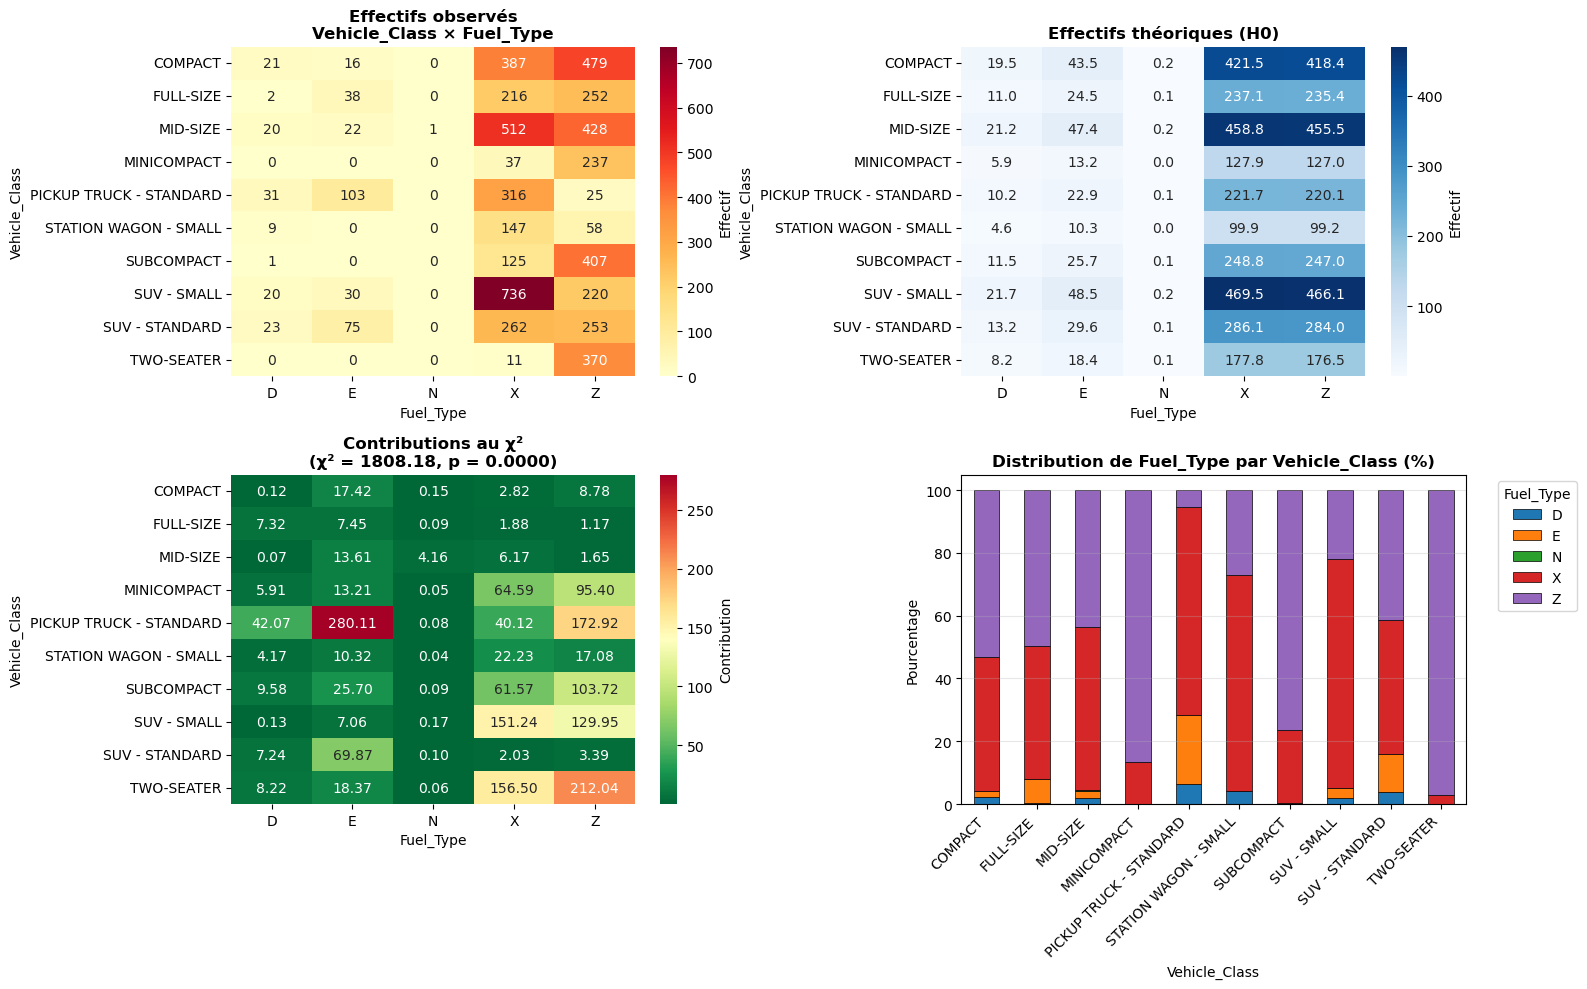


ANALYSE : Vehicle_Class vs Transmission

--- Tableau de contingence (effectifs observés) ---

Transmission              A6   A8   A9  AM7   AS6  AS7   AS8   AV   M5   M6  \
Vehicle_Class                                                                 
COMPACT                   29   17   21   47   164   50   160   32   61  222   
FULL-SIZE                  5   80    6   27   108   16   157   11    0   22   
MID-SIZE                  36   42   41   31   193   60   219   94   11  149   
MINICOMPACT               23    9    0   90    31    0     1    2   18   29   
PICKUP TRUCK - STANDARD  155  107    0    0    94    7     0    0    0    1   
STATION WAGON - SMALL      8    2    2   11    31    6    31   16   21   36   
SUBCOMPACT                13    6   22   54    73   39   117    5   16  124   
SUV - SMALL              126   29  108   12   276   16   141   61   32   63   
SUV - STANDARD           165   69   33    0    82   46   142    4    0    1   
TWO-SEATER                11    3   

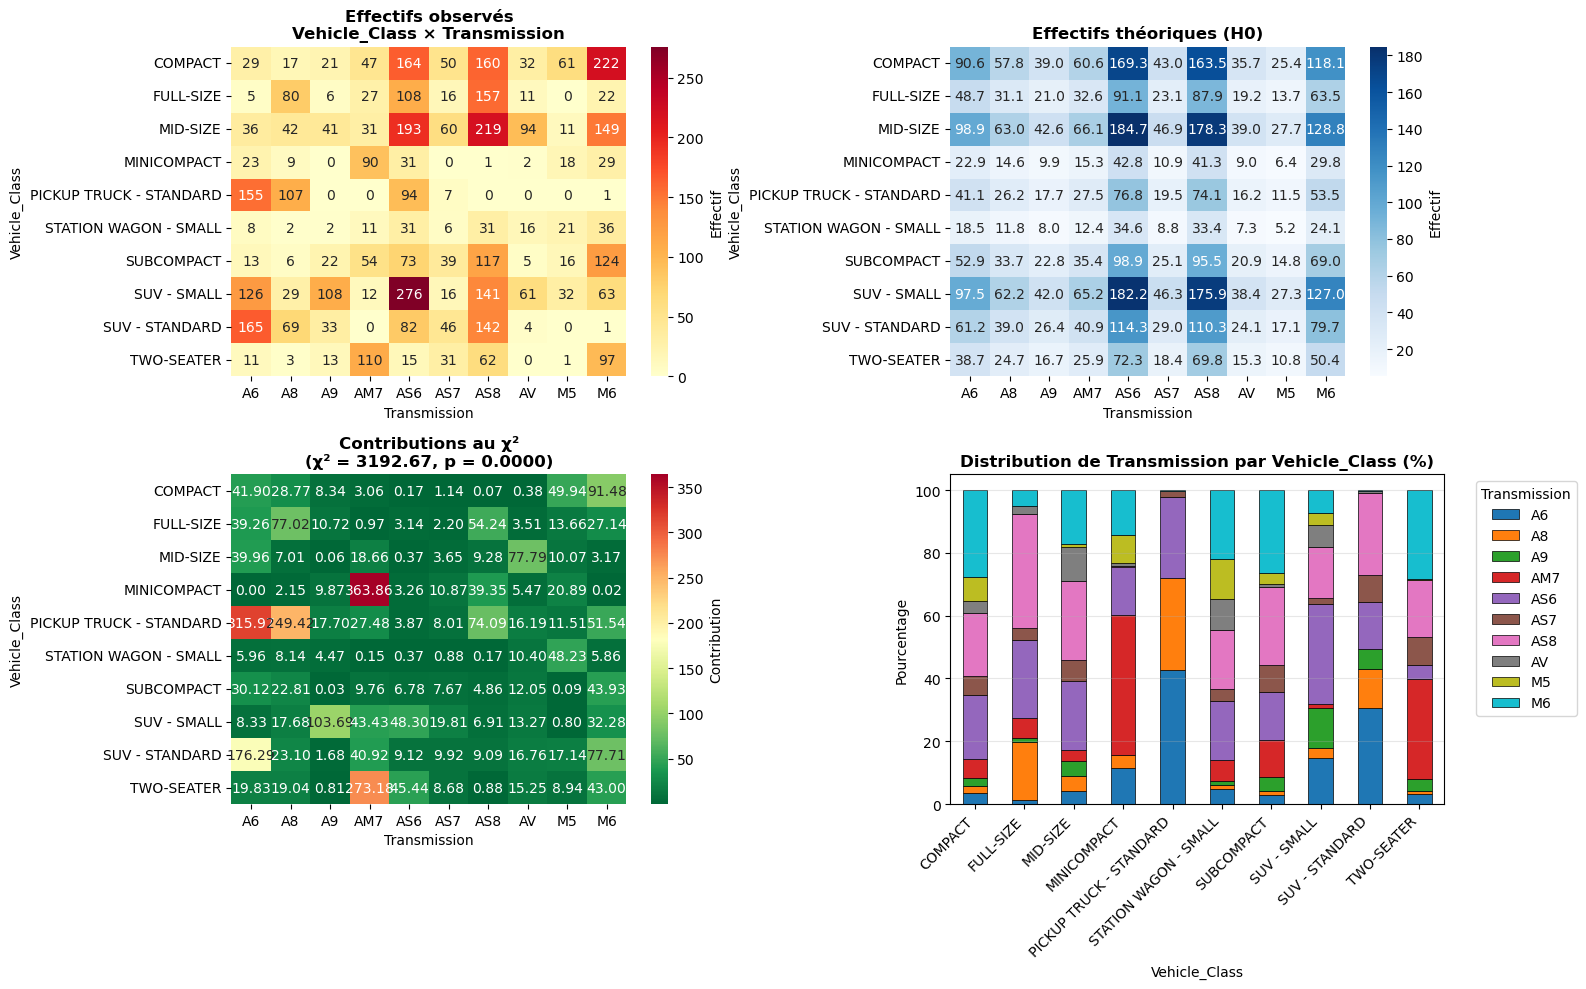


ANALYSE BIVARIÉE TERMINÉE

RÉSUMÉ :
- CAS 1 : 21 corrélations analysées via matrice
- CAS 1 détaillé : 3 paires avec régression linéaire
- CAS 2 : 3 analyses ANOVA
- CAS 3 : 2 tests du Chi-2


In [8]:
print("\n" + "="*70)
print("CAS 3 : DEUX VARIABLES QUALITATIVES (TEST DU CHI-2)")
print("="*70)

combinaisons_chi2 = [
    ('Vehicle_Class', 'Fuel_Type'),
    ('Vehicle_Class', 'Transmission')
]

for var1, var2 in combinaisons_chi2:
    print(f"\n{'='*70}")
    print(f"ANALYSE : {var1} vs {var2}")
    print(f"{'='*70}")
    
    # Filtrer pour garder modalités fréquentes
    counts1 = data[var1].value_counts()
    counts2 = data[var2].value_counts()
    
    top1 = counts1.head(10).index if len(counts1) > 10 else counts1.index
    top2 = counts2.head(10).index if len(counts2) > 10 else counts2.index
    
    data_filtered = data[data[var1].isin(top1) & data[var2].isin(top2)]
    
    # Tableau de contingence
    contingence = pd.crosstab(data_filtered[var1], data_filtered[var2], margins=True)
    
    print(f"\n--- Tableau de contingence (effectifs observés) ---\n")
    print(contingence)
    
    # Retirer les marges pour le test
    contingence_test = contingence.iloc[:-1, :-1]
    
    # Test du Chi-2
    chi2, p_value, dof, expected = chi2_contingency(contingence_test)
    
    print(f"\n--- Test du Chi-2 d'indépendance ---")
    print(f"Hypothèse H0 : Les deux variables sont indépendantes")
    print(f"Statistique χ² = {chi2:.4f}")
    print(f"Degrés de liberté = {dof}")
    print(f"P-value = {p_value:.6f}")
    
    if p_value < 0.05:
        print("→ REJET de H0 (p < 0.05)")
        print("→ Les variables sont DÉPENDANTES (relation significative)")
    else:
        print("→ ACCEPTATION de H0 (p >= 0.05)")
        print("→ Les variables sont INDÉPENDANTES (pas de relation)")
    
    # Tableau des effectifs théoriques
    expected_df = pd.DataFrame(expected, 
                               index=contingence_test.index, 
                               columns=contingence_test.columns)
    
    print(f"\n--- Effectifs théoriques (sous hypothèse d'indépendance) ---\n")
    print(expected_df.round(1))
    
    # Contributions au Chi-2
    contributions = (contingence_test - expected_df)**2 / expected_df
    
    print(f"\n--- Contributions au χ² par case ---")
    print(f"Formule : (Observé - Théorique)² / Théorique\n")
    print(contributions.round(2))
    
    print(f"\nCases contribuant le plus au Chi-2 :")
    contrib_flat = contributions.values.flatten()
    top_indices = np.argsort(contrib_flat)[-3:][::-1]
    for idx in top_indices:
        i = idx // len(contingence_test.columns)
        j = idx % len(contingence_test.columns)
        cat1 = contingence_test.index[i]
        cat2 = contingence_test.columns[j]
        obs = contingence_test.iloc[i, j]
        theo = expected_df.iloc[i, j]
        contrib = contributions.iloc[i, j]
        print(f"  - ({cat1}, {cat2}) : χ² = {contrib:.2f} | Obs={obs} vs Théo={theo:.1f}")
    
    # Graphiques
    fig = plt.figure(figsize=(16, 10))
    
    # Heatmap effectifs observés
    ax1 = plt.subplot(2, 2, 1)
    sns.heatmap(contingence_test, annot=True, fmt='d', cmap='YlOrRd', 
                ax=ax1, cbar_kws={'label': 'Effectif'})
    ax1.set_title(f'Effectifs observés\n{var1} × {var2}', fontweight='bold')
    ax1.set_xlabel(var2)
    ax1.set_ylabel(var1)
    
    # Heatmap effectifs théoriques
    ax2 = plt.subplot(2, 2, 2)
    sns.heatmap(expected_df, annot=True, fmt='.1f', cmap='Blues', 
                ax=ax2, cbar_kws={'label': 'Effectif'})
    ax2.set_title('Effectifs théoriques (H0)', fontweight='bold')
    ax2.set_xlabel(var2)
    ax2.set_ylabel(var1)
    
    # Heatmap contributions
    ax3 = plt.subplot(2, 2, 3)
    sns.heatmap(contributions, annot=True, fmt='.2f', cmap='RdYlGn_r', 
                ax=ax3, cbar_kws={'label': 'Contribution'})
    ax3.set_title(f'Contributions au χ²\n(χ² = {chi2:.2f}, p = {p_value:.4f})', 
                 fontweight='bold')
    ax3.set_xlabel(var2)
    ax3.set_ylabel(var1)
    
    # Barres empilées en %
    ax4 = plt.subplot(2, 2, 4)
    contingence_pct = contingence_test.div(contingence_test.sum(axis=1), axis=0) * 100
    contingence_pct.plot(kind='bar', stacked=True, ax=ax4, edgecolor='black', linewidth=0.5)
    ax4.set_title(f'Distribution de {var2} par {var1} (%)', fontweight='bold')
    ax4.set_xlabel(var1)
    ax4.set_ylabel('Pourcentage')
    ax4.legend(title=var2, bbox_to_anchor=(1.05, 1), loc='upper left')
    ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')
    ax4.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

print("\n" + "="*70)
print("ANALYSE BIVARIÉE TERMINÉE")
print("="*70)
print("\nRÉSUMÉ :")
print(f"- CAS 1 : {len(quant_vars)*(len(quant_vars)-1)//2} corrélations analysées via matrice")
print(f"- CAS 1 détaillé : 3 paires avec régression linéaire")
print(f"- CAS 2 : {len(combinaisons_anova)} analyses ANOVA")
print(f"- CAS 3 : {len(combinaisons_chi2)} tests du Chi-2")